In [2]:
import os
from tqdm import tqdm

import databento as db
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [6]:
api_key_path = r"C:\Users\natha\OneDrive\Desktop\databento_key.txt"
api_key = open(api_key_path, "r").read()
client = db.Historical(api_key)

In [7]:
output_path = r"C:\Users\natha\OneDrive\Desktop\C++\AgisCoreTest\data\FUTURES_DAILY\DATA.csv"
def download_df():
    data = client.timeseries.get_range(
        dataset='GLBX.MDP3',
        symbols=['ES.FUT','ZF.FUT','CL.FUT'],
        stype_in='parent',
        schema='ohlcv-1d',
        start='2018-10-01',
        end='2023-10-01',
    )
    return data.to_df()

def download_df_from_csv():
    data = pd.read_csv(output_path)
    data['time'] = pd.to_datetime(data['time'])
    data.set_index('time', inplace=True)
    return data


#data.replay(print)

In [8]:
output_path = r"C:\Users\natha\OneDrive\Desktop\C++\AgisCoreTest\data\FUTURES_DAILY"
df = download_df_from_csv()
#df.to_csv(os.path.join(output_path,"DATA.csv"))
df.head()

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2018-10-01 00:00:00+00:00,35,1,45649,0.67,0.74,0.65,0.73,497,CLM9-CLQ9
2018-10-01 00:00:00+00:00,35,1,151505,-6.17,-6.17,-6.17,-6.17,1,CLM9-BZZ9
2018-10-01 00:00:00+00:00,35,1,129366,0.71,0.79,0.69,0.79,427,CLV9-CLZ9
2018-10-01 00:00:00+00:00,35,1,226607,0.18,0.19,0.14,0.16,4347,CLG9-CLH9
2018-10-01 00:00:00+00:00,35,1,270470,0.16,0.18,0.13,0.16,9986,CLZ8-CLF9


In [10]:
# remove rows where symbol has "-" in it
df = df[~df['symbol'].str.contains('-|:')]
# convert datetime index to nanosecond epoch time
df.index = df.index.astype('int64')
df.index.name = 'epoch'
df.reset_index(inplace=True)
df.head()

,epoch,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
0,1538352000000000000,35,1,495655,60.10,61.06,60.10,60.99,12,CLZ2
1,1538352000000000000,35,1,415463,62.41,63.65,62.24,63.56,205,CLZ1
2,1538352000000000000,35,1,117678,71.64,73.93,71.51,73.72,145,CLN9
3,1538352000000000000,35,1,215236,59.10,59.10,59.10,59.10,1,CLZ3
4,1538352000000000000,35,1,79323,72.67,75.05,72.29,74.86,3245,CLH9


In [12]:
df["symbol"].unique()

array(['CLZ2', 'CLZ1', 'CLN9', 'CLZ3', 'CLH9', 'CLV9', 'CLG9', 'ESH9',
       'CLZ0', 'CLZ8', 'CLG0', 'CLM0', 'CLF9', 'CLK0', 'CLJ9', 'CLK9',
       'CLN1', 'CLQ9', 'CLX8', 'CLZ5', 'ZFH9', 'ESM9', 'CLU9', 'CLM1',
       'CLM9', 'CLZ9', 'ZFZ8', 'ESZ8', 'CLH0', 'CLF0', 'CLX9', 'ESU9',
       'CLQ0', 'CLZ4', 'CLV0', 'CLX0', 'CLJ0', 'CLN0', 'CLM2', 'CLV1',
       'CLM4', 'CLM3', 'ESZ9', 'CLU0', 'CLF1', 'ZFM9', 'ESH0', 'CLZ6',
       'CLH1', 'CLV7', 'CLG8', 'CLK7', 'CLZ7', 'ESM0', 'ZFU9', 'CLG1',
       'CLF8', 'CLU2', 'CLU1', 'CLX1', 'CLJ1', 'CLK1', 'CLQ1', 'CLX7',
       'ZFZ9', 'ESU0', 'CLF2', 'CLH3', 'CLK3', 'CLG3', 'CLN3', 'CLJ3',
       'ESZ0', 'ZFH0', 'CLK2', 'CLG2', 'CLH2', 'CLM5', 'CLJ2', 'ZFM0',
       'ESH1', 'CLN2', 'CLJ30', 'CLG4', 'CLV2', 'CLQ2', 'CLX2', 'ZFU0',
       'ESM1', 'CLF3', 'CLU3', 'CLX3', 'ESU1', 'ZFZ0', 'CLQ3', 'ESZ1',
       'ZFH1', 'ZFM1', 'CLG6', 'CLK4', 'CLH4', 'CLN4', 'CLF4', 'CLX4',
       'CLF5', 'CLZ30', 'ESH2', 'CLF6', 'CLF7', 'ESM2', 'ZFU1', 'CLZ31',
   

In [13]:
symbols = ["ESU9","ESM0"]
df_sub = df[df["symbol"].isin(symbols)]

grouped = df_sub.groupby("symbol")
symbol_dfs = {symbol: group for symbol, group in grouped}
# get shapes 
shapes = {symbol: group.shape for symbol, group in grouped}
shapes


{'ESM0': (261, 10), 'ESU9': (251, 10)}

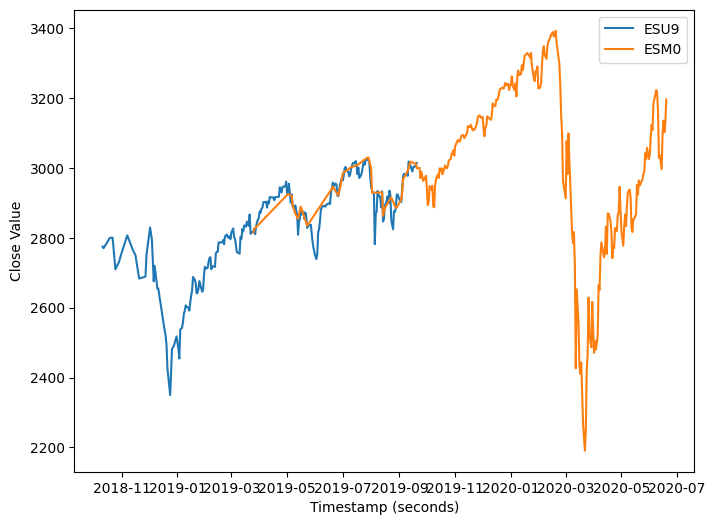

In [14]:
df_sub1 = symbol_dfs[symbols[0]]
df_sub2 = symbol_dfs[symbols[1]]

# Convert the "epoch" column to a Pandas datetime object
df_sub1["t"] =  pd.to_datetime(df_sub1["epoch"].astype('int64'))
df_sub2["t"] =  pd.to_datetime(df_sub2["epoch"].astype('int64'))

fig = plt.figure(figsize=(8, 6))

# Plot "close" values against the timestamp for both DataFrames
plt.plot(df_sub1["t"], df_sub1["close"], label=symbols[0])
plt.plot(df_sub2["t"], df_sub2["close"], label=symbols[1])

# Optionally, you can set labels for the axes
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Close Value")

# Add a legend to differentiate between the two DataFrames
plt.legend()

# Show the plot
plt.show()

In [75]:
from datetime import datetime
year_map = {
    "0" : "2020",
    "1" : "2021",
    "2" : "2022",
    "3" : "2023",
    "4" : "2024",
    "5" : "2025",
    "6" : "2026",
    "7" : "2017",
    "8" : "2018",
    "9" : "2019"
}
def map_futures_code_to_full_code(futures_code):
    if len(futures_code) == 5:
        #CLZ31. Inject "20" starting at index loc 2
        return futures_code[:3] + "20" + futures_code[3:]
    else:
        code = futures_code[0:2]
        month = futures_code[2]
        year = futures_code[3]
        return code + month + year_map[year]
        

tickers = df["symbol"].unique()
tickers

array(['CLZ2', 'CLZ1', 'CLN9', 'CLZ3', 'CLH9', 'CLV9', 'CLG9', 'ESH9',
       'CLZ0', 'CLZ8', 'CLG0', 'CLM0', 'CLF9', 'CLK0', 'CLJ9', 'CLK9',
       'CLN1', 'CLQ9', 'CLX8', 'CLZ5', 'ZFH9', 'ESM9', 'CLU9', 'CLM1',
       'CLM9', 'CLZ9', 'ZFZ8', 'ESZ8', 'CLH0', 'CLF0', 'CLX9', 'ESU9',
       'CLQ0', 'CLZ4', 'CLV0', 'CLX0', 'CLJ0', 'CLN0', 'CLM2', 'CLV1',
       'CLM4', 'CLM3', 'ESZ9', 'CLU0', 'CLF1', 'ZFM9', 'ESH0', 'CLZ6',
       'CLH1', 'CLV7', 'CLG8', 'CLK7', 'CLZ7', 'ESM0', 'ZFU9', 'CLG1',
       'CLF8', 'CLU2', 'CLU1', 'CLX1', 'CLJ1', 'CLK1', 'CLQ1', 'CLX7',
       'ZFZ9', 'ESU0', 'CLF2', 'CLH3', 'CLK3', 'CLG3', 'CLN3', 'CLJ3',
       'ESZ0', 'ZFH0', 'CLK2', 'CLG2', 'CLH2', 'CLM5', 'CLJ2', 'ZFM0',
       'ESH1', 'CLN2', 'CLJ30', 'CLG4', 'CLV2', 'CLQ2', 'CLX2', 'ZFU0',
       'ESM1', 'CLF3', 'CLU3', 'CLX3', 'ESU1', 'ZFZ0', 'CLQ3', 'ESZ1',
       'ZFH1', 'ZFM1', 'CLG6', 'CLK4', 'CLH4', 'CLN4', 'CLF4', 'CLX4',
       'CLF5', 'CLZ30', 'ESH2', 'CLF6', 'CLF7', 'ESM2', 'ZFU1', 'CLZ31',
   

In [76]:
ticker = "CLJ30"
a = [map_futures_code_to_full_code(ticker) for ticker in tickers if "CL" in ticker]
a = np.array(a)
a

array(['CLZ2022', 'CLZ2021', 'CLN2019', 'CLZ2023', 'CLH2019', 'CLV2019',
       'CLG2019', 'CLZ2020', 'CLZ2018', 'CLG2020', 'CLM2020', 'CLF2019',
       'CLK2020', 'CLJ2019', 'CLK2019', 'CLN2021', 'CLQ2019', 'CLX2018',
       'CLZ2025', 'CLU2019', 'CLM2021', 'CLM2019', 'CLZ2019', 'CLH2020',
       'CLF2020', 'CLX2019', 'CLQ2020', 'CLZ2024', 'CLV2020', 'CLX2020',
       'CLJ2020', 'CLN2020', 'CLM2022', 'CLV2021', 'CLM2024', 'CLM2023',
       'CLU2020', 'CLF2021', 'CLZ2026', 'CLH2021', 'CLV2017', 'CLG2018',
       'CLK2017', 'CLZ2017', 'CLG2021', 'CLF2018', 'CLU2022', 'CLU2021',
       'CLX2021', 'CLJ2021', 'CLK2021', 'CLQ2021', 'CLX2017', 'CLF2022',
       'CLH2023', 'CLK2023', 'CLG2023', 'CLN2023', 'CLJ2023', 'CLK2022',
       'CLG2022', 'CLH2022', 'CLM2025', 'CLJ2022', 'CLN2022', 'CLJ2030',
       'CLG2024', 'CLV2022', 'CLQ2022', 'CLX2022', 'CLF2023', 'CLU2023',
       'CLX2023', 'CLQ2023', 'CLG2026', 'CLK2024', 'CLH2024', 'CLN2024',
       'CLF2024', 'CLX2024', 'CLF2025', 'CLZ2030', 

In [46]:
tickers = df["symbol"].unique()

path = r"C:\Users\natha\OneDrive\Desktop\C++\AgisCoreTest\data\FUTURES_DAILY"
_path = os.path.join(path, "data.h5")

# remove file if it already exists
if os.path.exists(_path):
    os.remove(_path)

for ticker in tqdm(tickers):
    with h5.File(_path, "a") as file:
        # Convert the DataFrame to a NumPy array
        rows = df[df['symbol'] == ticker].copy()
        rows.sort_values(by='epoch', inplace=True)
        cols = ["open","high","low","close","volume"]
        data = rows[cols].to_numpy()

        # Create a new dataset and save the data
        ticker = map_futures_code_to_full_code(ticker)
        file.create_dataset(f"{ticker}/datetime", data=rows["epoch"].to_numpy())
        dataset = file.create_dataset(f"{ticker}/data", data=data)

        # Store column names as attributes
        for col_name in cols:
            dataset.attrs[col_name] = col_name

100%|██████████| 155/155 [00:00<00:00, 176.02it/s]


In [16]:
# find all tickers that start with "CL"
tickers = [ticker for ticker in tickers if ticker.startswith("CL")]
# for each ticker, get all rows and calculate the rolling 50 day volatility
dfs = []
for ticker in tickers:
    df_sub = df[df["symbol"] == ticker].copy()
    df_sub["volatility"] = df_sub["close"].rolling(50).std()
    df_sub.set_index("epoch", inplace=True)
    dfs.append(df_sub)

# concatenate all the DataFrames by joining on the index
result_df = pd.concat(dfs)
result_df.tail()

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,volatility
epoch,,,,,,,,,,
1691625600000000000,35,1,432669,71.80,71.80,71.80,71.80,1,CLX5,NaN
1692057600000000000,35,1,432669,70.50,70.50,70.50,70.50,1,CLX5,NaN
1690502400000000000,35,1,655565,70.60,70.60,70.60,70.60,10,CLV5,NaN
1691625600000000000,35,1,655565,72.00,72.00,72.00,72.00,2,CLV5,NaN
1692057600000000000,35,1,655565,70.75,70.75,70.75,70.75,2,CLV5,NaN


In [1]:
p = r"C:\Users\natha\OneDrive\Desktop\CL_CONT.csv"
# read to df without headers
df_cont = pd.read_csv(p, header=None)
df_cont.columns = ["epoch", "close"]
df_cont["epoch"] = pd.to_datetime(df_cont["epoch"].astype('int64'))
# drop last row
df_cont.drop(df_cont.tail(1).index,inplace=True)
df_cont

NameError: name 'pd' is not defined

In [112]:
ticker = "CLX8"
x = df[df["symbol"] == ticker]
x["epoch"] = pd.to_datetime(x["epoch"].astype('int64'))

C:\Users\natha\AppData\Local\Temp\ipykernel_17512\2792430605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["epoch"] = pd.to_datetime(x["epoch"].astype('int64'))


C:\Users\natha\AppData\Local\Temp\ipykernel_17512\1861928185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["epoch"] = pd.to_datetime(x["epoch"].astype('int64'))


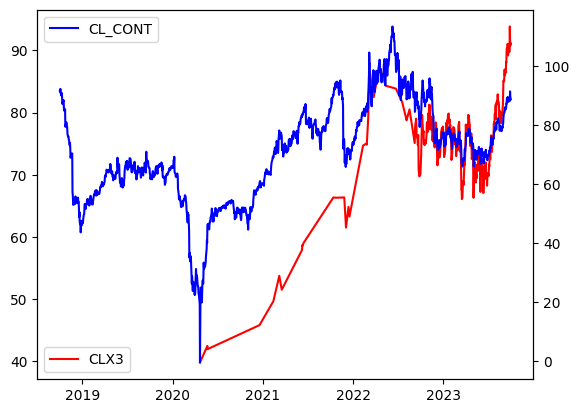

In [117]:
ticker = "CLX3"
x = df[df["symbol"] == ticker]
x["epoch"] = pd.to_datetime(x["epoch"].astype('int64'))

plt.plot(x["epoch"], x["close"], c = "r", label = ticker)
plt.legend(loc = "lower left")
# plt on new axis
ax = plt.gca()
ax2 = ax.twinx()
n = 110
ax2.plot(df_cont["epoch"], df_cont["close"], label = "CL_CONT", c = "b")
plt.legend(loc = "upper left")

In [93]:
df_cont["epoch"].tail(n).head(20)

765   2021-03-18
766   2021-03-19
767   2021-03-21
768   2021-03-22
769   2021-03-23
770   2021-03-24
771   2021-03-25
772   2021-03-26
773   2021-03-28
774   2021-03-29
775   2021-03-30
776   2021-03-31
777   2021-04-01
778   2021-04-02
779   2021-10-15
780   2021-10-24
781   2021-10-26
782   2021-10-27
783   2021-11-30
784   2022-02-11
Name: epoch, dtype: datetime64[ns]

In [68]:
tickers

['CLZ2',
 'CLZ1',
 'CLN9',
 'CLZ3',
 'CLH9',
 'CLV9',
 'CLG9',
 'CLZ0',
 'CLZ8',
 'CLG0',
 'CLM0',
 'CLF9',
 'CLK0',
 'CLJ9',
 'CLK9',
 'CLN1',
 'CLQ9',
 'CLX8',
 'CLZ5',
 'CLU9',
 'CLM1',
 'CLM9',
 'CLZ9',
 'CLH0',
 'CLF0',
 'CLX9',
 'CLQ0',
 'CLZ4',
 'CLV0',
 'CLX0',
 'CLJ0',
 'CLN0',
 'CLM2',
 'CLV1',
 'CLM4',
 'CLM3',
 'CLU0',
 'CLF1',
 'CLZ6',
 'CLH1',
 'CLV7',
 'CLG8',
 'CLK7',
 'CLZ7',
 'CLG1',
 'CLF8',
 'CLU2',
 'CLU1',
 'CLX1',
 'CLJ1',
 'CLK1',
 'CLQ1',
 'CLX7',
 'CLF2',
 'CLH3',
 'CLK3',
 'CLG3',
 'CLN3',
 'CLJ3',
 'CLK2',
 'CLG2',
 'CLH2',
 'CLM5',
 'CLJ2',
 'CLN2',
 'CLJ30',
 'CLG4',
 'CLV2',
 'CLQ2',
 'CLX2',
 'CLF3',
 'CLU3',
 'CLX3',
 'CLQ3',
 'CLG6',
 'CLK4',
 'CLH4',
 'CLN4',
 'CLF4',
 'CLX4',
 'CLF5',
 'CLZ30',
 'CLF6',
 'CLF7',
 'CLZ31',
 'CLM6',
 'CLV3',
 'CLU4',
 'CLJ5',
 'CLJ4',
 'CLU5',
 'CLQ4',
 'CLH5',
 'CLM30',
 'CLG5',
 'CLN5',
 'CLM7',
 'CLV4',
 'CLZ33',
 'CLH6',
 'CLH7',
 'CLU6',
 'CLQ6',
 'CLK5',
 'CLZ32',
 'CLQ5',
 'CLX5',
 'CLV5']